# K-Means Clustering and Support Vector Machines
The short script aims to get acquainted with K-Means Clustering and Support Vector Machine

### K-Means Clustering: 
* An unsupervised machine learning algorithm. 
* Assign k number of cluster centroids. The data point that is closest to a specific centroid will get assign to that centroid. After finish each iteration, the value of the centroids get updated based on the data points assign to it. The algorithm stops when there are no change in membership between the centroids.

### Support Vector Machine (SVM): 
* A supervised learning algorithm which outputs an optimal hyperplane which categorizes new examples. 
* Effective in high dimensional spaces and uses the kernel trick to calculates separation line in higher dimension


<b>Principle Component Analysis (PCA)</b>: A technique for dimensionality reduction which increasing interpretability but at the same time minimizing information loss by creating new uncorrelated variables that successively maximize variance. 


For more info:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

* https://scikit-learn.org/stable/modules/svm.html
* https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72

* https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

## Step 1: Setup

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()

## Step 2: Load and Visual the Data

In [2]:
# Load the data set
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


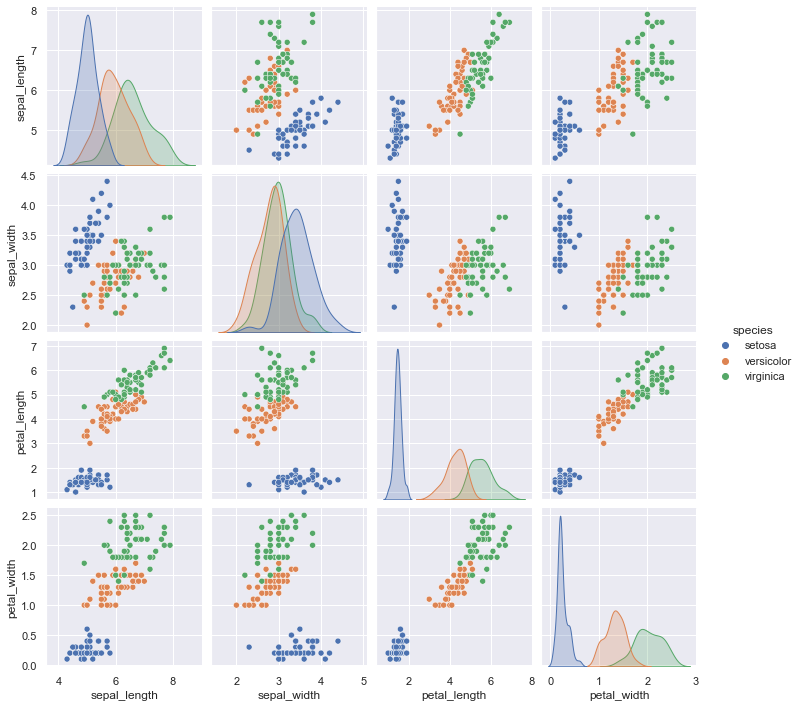

In [3]:
# Visualize the data with pair plots
sns.pairplot(iris, hue='species', height=2.5)

## Step 3: Data Preprocessing
Note: Only need to use this if load the Iris dataset from seaborn. The Iris dataset also available in scikit-learn

In [4]:
# Get the four attributes from the dataframe (sepal_length, sepal_width, petal_length, petal_width)
X = iris[iris.columns[0:iris.columns.size-1]]

# Convert Word label into Digit label ('setosa', 'versicolor', 'virginica' => 0, 1, 2)
y = iris['species'].replace(iris['species'].unique(), (0, 1, 2))

## Step 4: Principle Component Analysis (PCA)
Use PCA for  dimensionality reduction and prepare the data for K-Means Clustering

In [5]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

# Configure the PCA and Fit + Transform the input data
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

In [6]:
# There are 4 components (dimensions) originally but get transformed into 2 components
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


#### With just two dimensions, we captured > 95% variance of the dataset

In [7]:
# Print PCA results
print("Variance captured by the first dimension: ", pca.explained_variance_ratio_[0])
print("Variance captured by the second dimension: ", pca.explained_variance_ratio_[1])
print("Total Variance caputured by the first two dimensions: ", sum(pca.explained_variance_ratio_))

Variance captured by the first dimension:  0.9246187232017271
Variance captured by the second dimension:  0.05306648311706782
Total Variance caputured by the first two dimensions:  0.977685206318795


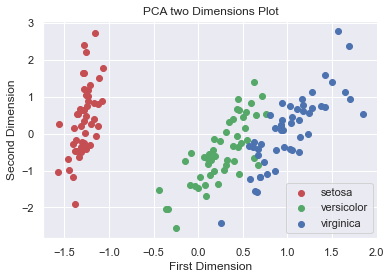

In [8]:
# https://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut1.html
from itertools import cycle
import pylab as pl

# Plot the dataset in two dimensions
colors = cycle('rgb')
target_ids = range(len(iris['species'].unique()))
for i, c, label in zip(target_ids, colors, iris['species'].unique()):
    pl.scatter(X_pca[y == i, 0], X_pca[y == i, 1],c=c, label=label)

pl.legend()
pl.xlabel('First Dimension')
pl.ylabel('Second Dimension')
pl.title('PCA two Dimensions Plot')
pl.show()

## Step 5: K-Means Clustering

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

# Create the K_Means model with 3 clusters
kmeans_model = KMeans(n_clusters=3)

# Normalized the data with scale and fit to the model
kmeans_model = kmeans_model.fit(scale(X_pca))

# Print predicted labels
print("KMeans predicted labels: ", kmeans_model.labels_)

KMeans predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


#### The K-Means model did a good job a clustering the group the on the left (Setosa) but not so much with the other two groups since they are too close to each other

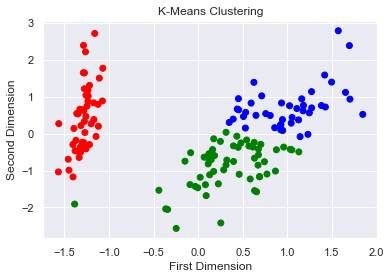

In [10]:
# Create a dataframe to use the use apply()
data = {'true_label': y, 'kmeans_predicted': kmeans_model.labels_}
df = pd.DataFrame(data)

# Create a color dictionary
color_dict = {0: 'red', 1: 'green', 2: 'blue'}

# Visualize the result
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['kmeans_predicted'].apply(lambda x: color_dict[x]))
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title("K-Means Clustering")
plt.show()

## Step 6: Support Vector Machine (SVM) / Support Vector Classification (SVC)

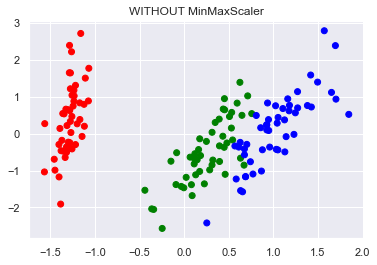

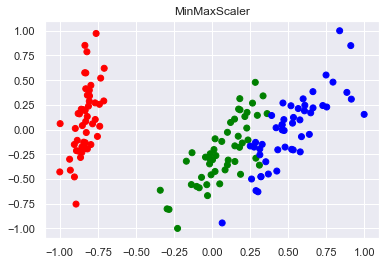

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

plt.scatter(X_pca[:,0], X_pca[:,1], c=df['true_label'].apply(lambda x: color_dict[x]))
plt.title("WITHOUT MinMaxScaler")
plt.show()

# Use MinMaxScaler to scale the input data
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_pca)
X_scaled = scaling.transform(X_pca)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['true_label'].apply(lambda x: color_dict[x]))
plt.title("MinMaxScaler")
plt.show()

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# Configure and fit the SVC classifier
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X_scaled, y)

#### Note: The plot background color is the SVC predictions and the data points color is the true label

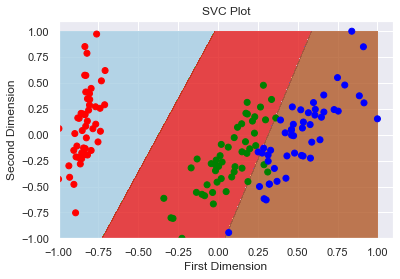

In [13]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html

# Make the meshgrid (x-min, y-min, stepsized)
xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                     np.arange(-1, 1, .001))

# Ravel the messgrid and convert (concat) to 2D points
data_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the label on all the data points and reshape the result
Z = svc.predict(data_points)
Z = Z.reshape(xx.shape)

# Visualize: Plot the contour and the data points
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['true_label'].apply(lambda x: color_dict[x]))
pl.xlabel('First Dimension')
pl.ylabel('Second Dimension')
pl.title('SVC Plot')
pl.show()